In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
from ising_genetic import genetic_algorithm
from matplotlib import pyplot as plt

# Exact results

In [11]:
# Critical value
betac = np.log(1.0 + np.sqrt(2)) / 2.0

In [12]:
def exact_mag_per_site(beta):
    if beta < betac:
        return 0
    return np.power((1 - np.power(np.sinh(2 * beta), -4)), 1.0 / 8.0)


def exact_mag_per_site_vec(betas):
    return np.array([exact_mag_per_site(beta) for beta in betas])

# Phase transition analysis

In this notebook, we use a genetic algorithm to compute a population of lowest energy states in the Ising model at a given temperature.

In [20]:
output_hot = genetic_algorithm(10, 0.01 * betac, 0.01, n_states=50, n_children=5, n_cycles=4_000, mutation_rate=0.01)
output_cold = genetic_algorithm(10, 20.0 * betac, 0.01, n_states=50, n_children=5, n_cycles=4_000, mutation_rate=0.01)

[Text(0.5, 0, '$m$'), Text(0.5, 0, '$m$')]

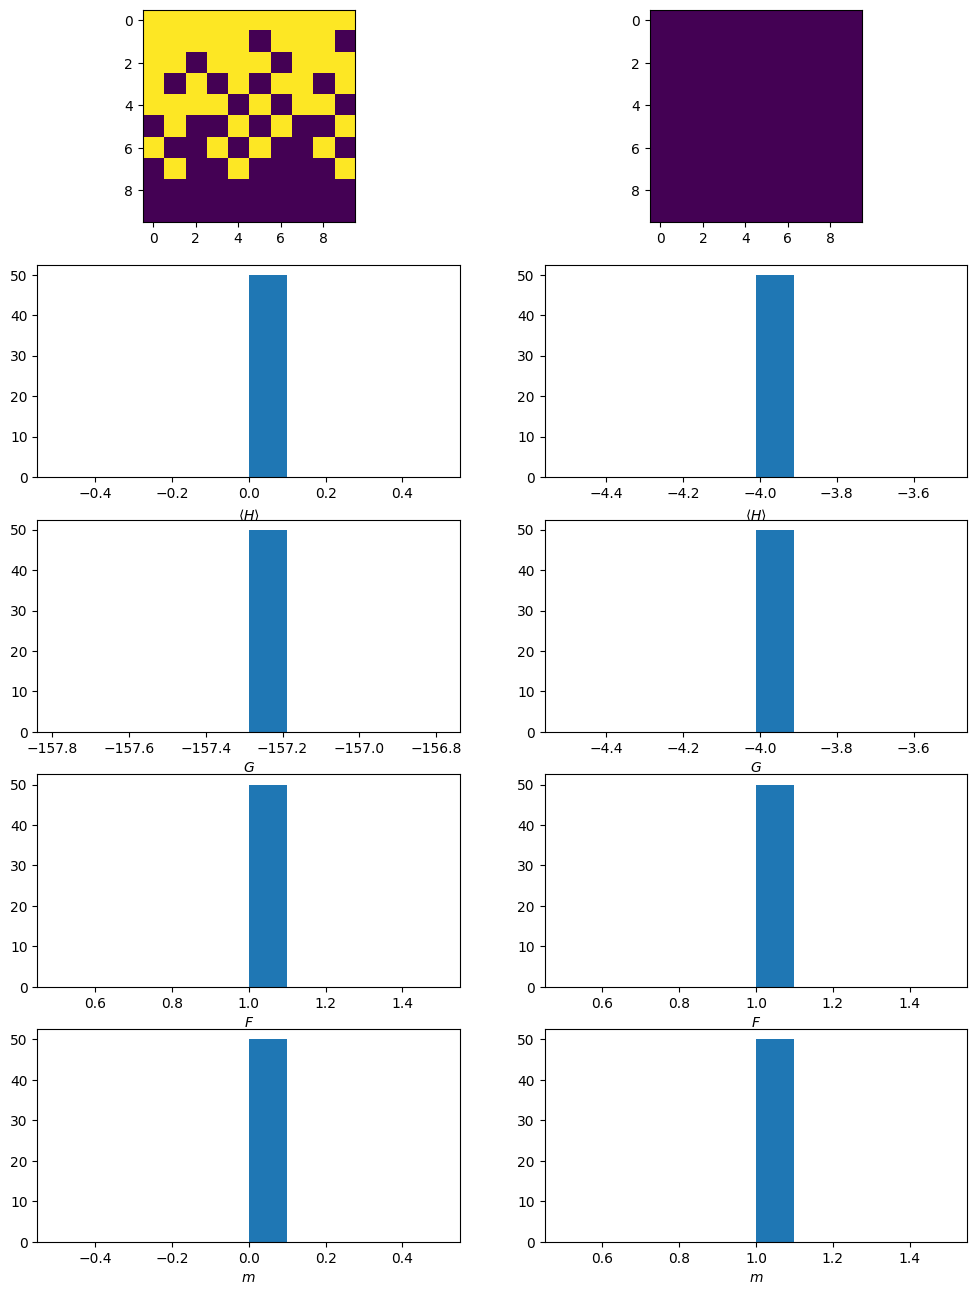

In [21]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))
axs[0, 0].imshow(output_hot["population"][0])
axs[0, 1].imshow(output_cold["population"][0])
axs[1, 0].hist(output_hot["energies"])
axs[1, 1].hist(output_cold["energies"])
axs[2, 0].hist(output_hot["gibbs_energies"])
axs[2, 1].hist(output_cold["gibbs_energies"])
axs[3, 0].hist(output_hot["fitness"])
axs[3, 1].hist(output_cold["fitness"])
axs[4, 0].hist(output_hot["magnetizations"])
axs[4, 1].hist(output_cold["magnetizations"])

[ax.set_xlabel(r"$\langle H \rangle$") for ax in axs[1]]
[ax.set_xlabel(r"$G$") for ax in axs[2]]
[ax.set_xlabel(r"$F$") for ax in axs[3]]
[ax.set_xlabel(r"$m$") for ax in axs[4]]

In [16]:
betas = np.linspace(0.1, 1.5, num=20) * betac

In [21]:
outputs_10 = [
    genetic_algorithm(10, beta, 0.01, n_states=50, n_children=5, n_cycles=6_000, mutation_rate=0.01) for beta in betas
]

outputs_20 = [
    genetic_algorithm(20, beta, 0.01, n_states=50, n_children=5, n_cycles=6_000, mutation_rate=0.01) for beta in betas
]

outputs_40 = [
    genetic_algorithm(40, beta, 0.01, n_states=50, n_children=5, n_cycles=6_000, mutation_rate=0.01) for beta in betas
]

In [25]:
outputs_40 = [
    genetic_algorithm(40, beta, 0.01, n_states=100, n_children=10, n_cycles=6_000, mutation_rate=0.01)
    for beta in betas
]

In [18]:
def compute_mag(outputs):
    return [np.average(np.abs(output["magnetizations"])) for output in outputs]

In [26]:
mags_average_10 = compute_mag(outputs_10)
mags_average_20 = compute_mag(outputs_20)
mags_average_40 = compute_mag(outputs_40)

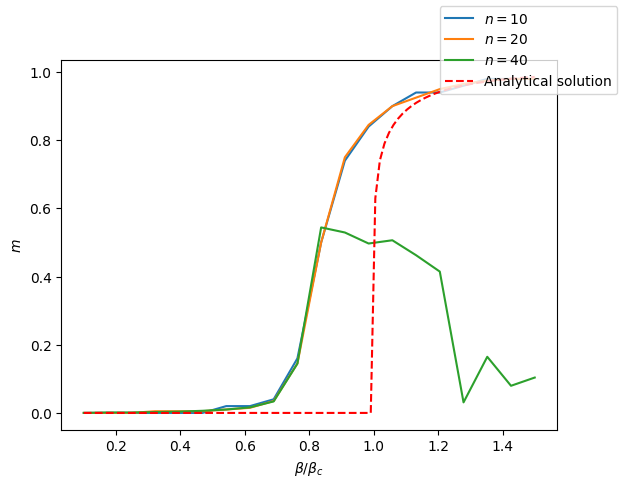

In [27]:
fig, ax = plt.subplots()
ax.plot(betas / betac, mags_average_10, label=r"$n = 10$")
ax.plot(betas / betac, mags_average_20, label=r"$n = 20$")
ax.plot(betas / betac, mags_average_40, label=r"$n = 40$")

betas_more = np.linspace(0.1, 1.5, num=100) * betac
ax.plot(betas_more / betac, exact_mag_per_site_vec(betas_more), "r--", label="Analytical solution")

ax.set_xlabel(r"$\beta/\beta_c$")
ax.set_ylabel(r"$m$")

fig.legend()

We see the transition point is shifted, this has been observed in the original reference [\[1\]](https://doi.org/10.1142/S0217984905008153). The main culprit is likely to be the two-cumulants approximation for the entropy.